## Implementing and testing ML models predicting W/L

We will not train the machine learning models using scikit-learn's `LogisticRegression` and xgboost's `XGBClassifier`.
Users can implement their own models by making a Class in the `models.py` file.

In [1]:
# import classes from models.py
from models import LogReg, GradientBoostedModel

#import data from dataset.py
from dataset import X_train, X_test, y_train, y_test, random_state

Dataset size: 9183
Train set size: 7346
Test set size: 1837
To make predictions, please provide a dictionary of values in the following format:
 {'moves': 'value', 'my_rating': 'value', 'opponent_rating': 'value', 'my_accuracy': 'value', 'opponent_accuracy': 'value', 'rating_difference': 'value', 'time_format_Blitz': 'value', 'time_format_Bullet': 'value', 'time_format_Rapid': 'value', 'colour_Black': 'value', 'colour_White': 'value'}


### Logistic Regression

We will first try a logistic regression model to predict whether I would win or lose a game. We will be using GridSearch to look for the best possible model with 5-fold cross validation.

In [2]:
lr = LogReg(X_train, X_test, y_train, y_test)
lr.initialise_model(random_state=random_state)

Initialising Logistic Regression model...


LogisticRegression(random_state=82)

In [3]:
# get list of hyperparameters in scikit-learn's LogisticRegression model
hyperparams = lr.get_hyperparams()
hyperparams

['C',
 'class_weight',
 'dual',
 'fit_intercept',
 'intercept_scaling',
 'l1_ratio',
 'max_iter',
 'multi_class',
 'n_jobs',
 'penalty',
 'random_state',
 'solver',
 'tol',
 'verbose',
 'warm_start']

In [4]:
# set hyperparameter values for grid search
Cs = [1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10]
max_iterations = [50, 100, 500, 1000, 10000, 100000]

# enter each hyperparameter as a keyword argument
param_grid = lr.set_param_grid(C = Cs, max_iter = max_iterations)

In [5]:
# train model using 5-fold cross-validation and grid search
lr.train_model(n_folds = 5)

Using Grid search to find best parameters for Logistic Regression model...
Fitting 5 folds for each of 42 candidates, totalling 210 fits
Best parameters found:  {'C': 10, 'max_iter': 50}
Highest accuracy found:  90.7%
Choosing best estimator from grid search...


LogisticRegression(C=10, max_iter=50, random_state=82)

In [6]:
# evaluate model on test set
lr.evaluate_model()

The accuracy of our Logistic Regression model is: 90.0%.
The recall of our Logistic Regression model is: 89.9%.


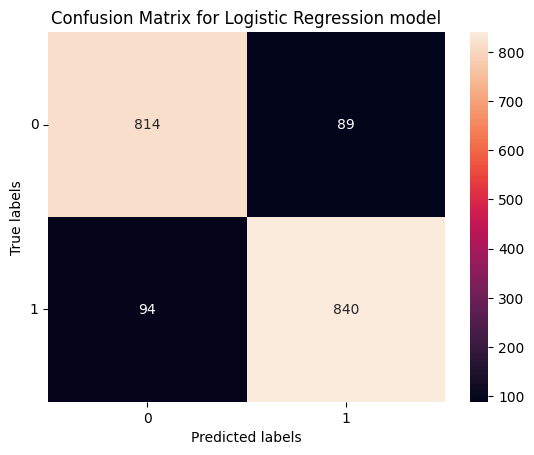

In [7]:
# plot confusion matrix for model
lr.plot_confusion_matrix()

In [8]:
# make prediction using model on new data
make_pred = {'moves': 20,
             'my_rating': 1200,
             'opponent_rating': 1400,
             'my_accuracy': 90.,
             'opponent_accuracy': 80.,
             'rating_difference': -200,
             'time_format_Blitz': 0,
             'time_format_Bullet': 0,
             'time_format_Rapid': 1,
             'colour_Black': 0,
             'colour_White': 1}

lr.make_prediction(make_pred)

The predicted outcome is a loss. This is predicted with a probability of 1.0.


### Gradient Boosted Model

We will now implement an ensemble model that uses gradient boosting via the xgboost library. We will be using decision trees as our base learners as these work well with datasets with a small number of features. On average, ensemble models perform better than individual learners so we will try to use GridSearchCV to find the best model.

In [9]:
# initialise gradient boosted model
gbm = GradientBoostedModel(X_train, X_test, y_train, y_test)
gbm.initialise_model(random_state=random_state)

Initialising Gradient Boosted model...


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=82, ...)

In [10]:
# get list of hyperparameters in xgboost's XGBClassifier model
gbm.get_hyperparams()

['objective',
 'use_label_encoder',
 'base_score',
 'booster',
 'callbacks',
 'colsample_bylevel',
 'colsample_bynode',
 'colsample_bytree',
 'early_stopping_rounds',
 'enable_categorical',
 'eval_metric',
 'feature_types',
 'gamma',
 'gpu_id',
 'grow_policy',
 'importance_type',
 'interaction_constraints',
 'learning_rate',
 'max_bin',
 'max_cat_threshold',
 'max_cat_to_onehot',
 'max_delta_step',
 'max_depth',
 'max_leaves',
 'min_child_weight',
 'missing',
 'monotone_constraints',
 'n_estimators',
 'n_jobs',
 'num_parallel_tree',
 'predictor',
 'random_state',
 'reg_alpha',
 'reg_lambda',
 'sampling_method',
 'scale_pos_weight',
 'subsample',
 'tree_method',
 'validate_parameters',
 'verbosity']

In [11]:
# set hyperparameter values for grid search
learning_rates = [0.005, 0.01, 0.05, 0.1, 0.5]
n_estimators = [10, 100, 500, 1000]
subsamples = [0.5, 0.75, 1]

# enter each hyperparameter as a keyword argument
param_grid = gbm.set_param_grid(learning_rate = learning_rates,
                                n_estimators = n_estimators,
                                subsample = subsamples)

Training the xgboost model using this big of a grid search will take ~15-20 minutes

In [12]:
# train model using 5-fold cross-validation and grid search
gbm.train_model(n_folds = 5)

Using Grid search to find best parameters for Gradient Boosted model...
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters found:  {'learning_rate': 0.005, 'n_estimators': 1000, 'subsample': 0.5}
Highest accuracy found:  90.95%
Choosing best estimator from grid search...


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.005, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=82, ...)

In [13]:
# evaluate model on test set
gbm.evaluate_model()

The accuracy of our Gradient Boosted model is: 90.0%.
The recall of our Gradient Boosted model is: 90.10000000000001%.


In [14]:
# make prediction using model on new data
gbm.make_prediction(make_pred)

The predicted outcome is a loss. This is predicted with a probability of 0.6800000071525574.
